In [8]:
import pandas as pd

In [9]:
train = pd.read_csv(r"C:\Users\Administrator\Downloads\playground-series-s5e2\training_extra.csv")
train1 = pd.read_csv(r"C:\Users\Administrator\Downloads\playground-series-s5e2\train.csv")
test = pd.read_csv(r"C:\Users\Administrator\Downloads\playground-series-s5e2\test.csv")
testids = test['id']

In [10]:
train1.tail(10)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
299990,299990,Nike,Polyester,Medium,4.0,No,No,Tote,Gray,8.493494,37.66645
299991,299991,NaN,Polyester,Large,7.0,No,No,Messenger,Red,27.897502,138.70658
299992,299992,Adidas,Polyester,Small,10.0,Yes,No,Messenger,Gray,9.559935,96.90682
299993,299993,Nike,Leather,Large,9.0,No,Yes,Tote,Red,28.910825,142.29540
299994,299994,Under Armour,Nylon,Large,4.0,Yes,No,Messenger,Green,20.392117,113.59984
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080
299999,299999,Under Armour,Canvas,Small,2.0,No,Yes,Backpack,Black,18.568865,26.72762


In [11]:
data = pd.concat([train, train1], ignore_index=True)

In [12]:
data.shape

(3994318, 11)

In [13]:
null_values = data.isnull().sum()
print(null_values)

id                           0
Brand                   126758
Material                110962
Size                     87785
Compartments                 0
Laptop Compartment       98533
Waterproof               94324
Style                   104180
Color                   133617
Weight Capacity (kg)      1808
Price                        0
dtype: int64


In [14]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for null values
null_values = data.isnull().sum()
print("Null values in each column:")
print(null_values)

Number of duplicate rows: 0
Null values in each column:
id                           0
Brand                   126758
Material                110962
Size                     87785
Compartments                 0
Laptop Compartment       98533
Waterproof               94324
Style                   104180
Color                   133617
Weight Capacity (kg)      1808
Price                        0
dtype: int64


In [15]:
data.dropna(inplace=True)

In [16]:
data.shape

(3288503, 11)

In [17]:
null_values = data.isnull().sum()
print(null_values)

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64


In [18]:
data.drop(columns=['id'], inplace=True)

In [19]:
data.describe()

,Compartments,Weight Capacity (kg),Price
count,3.288503e+06,3.288503e+06,3.288503e+06
mean,5.441262e+00,1.799719e+01,8.149096e+01
std,2.888815e+00,6.967921e+00,3.882212e+01
min,1.000000e+00,5.000000e+00,1.500000e+01
25%,3.000000e+00,1.205773e+01,4.780518e+01
50%,5.000000e+00,1.802650e+01,8.117528e+01
75%,8.000000e+00,2.397621e+01,1.148033e+02
max,1.000000e+01,3.000000e+01,1.500000e+02


In [20]:
unique_counts = data.nunique()
print(unique_counts)

Brand                         5
Material                      4
Size                          3
Compartments                 10
Laptop Compartment            2
Waterproof                    2
Style                         3
Color                         6
Weight Capacity (kg)    1582006
Price                     48358
dtype: int64


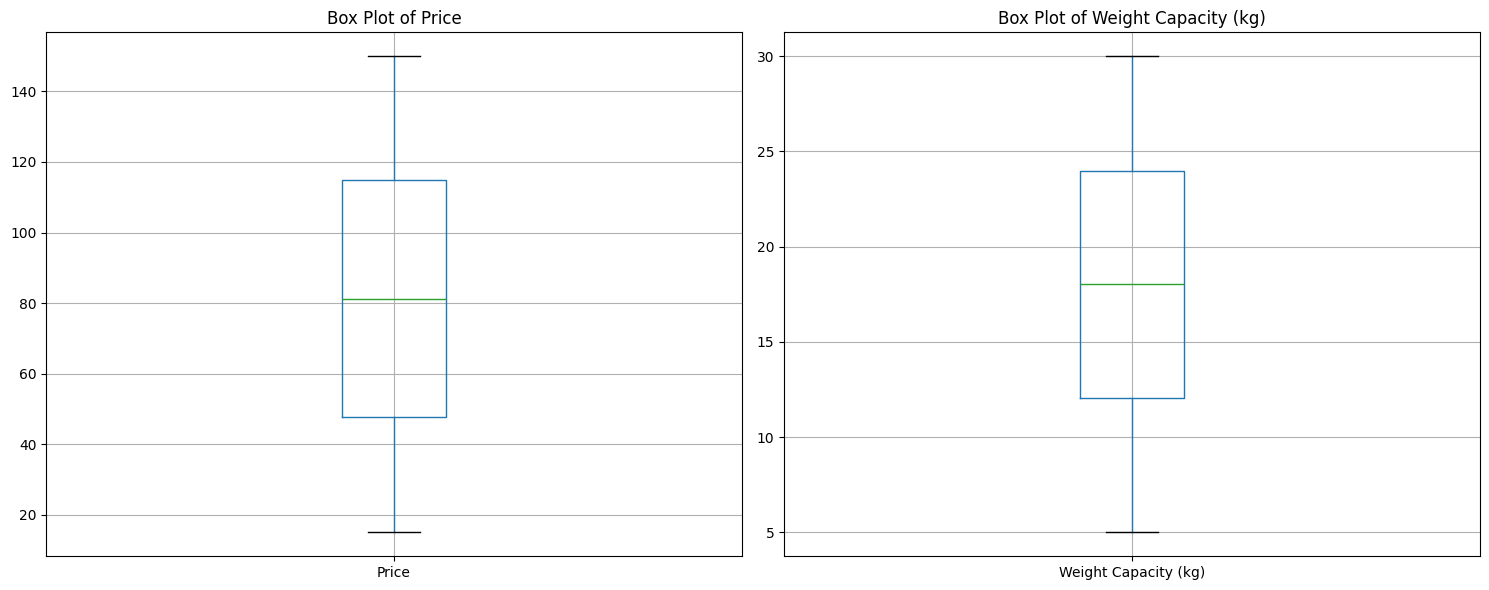

In [21]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot for Price
data.boxplot(column='Price', ax=axes[0])
axes[0].set_title('Box Plot of Price')

# Box plot for Weight Capacity (kg)
data.boxplot(column='Weight Capacity (kg)', ax=axes[1])
axes[1].set_title('Box Plot of Weight Capacity (kg)')

# Show the plots
plt.tight_layout()
plt.show()

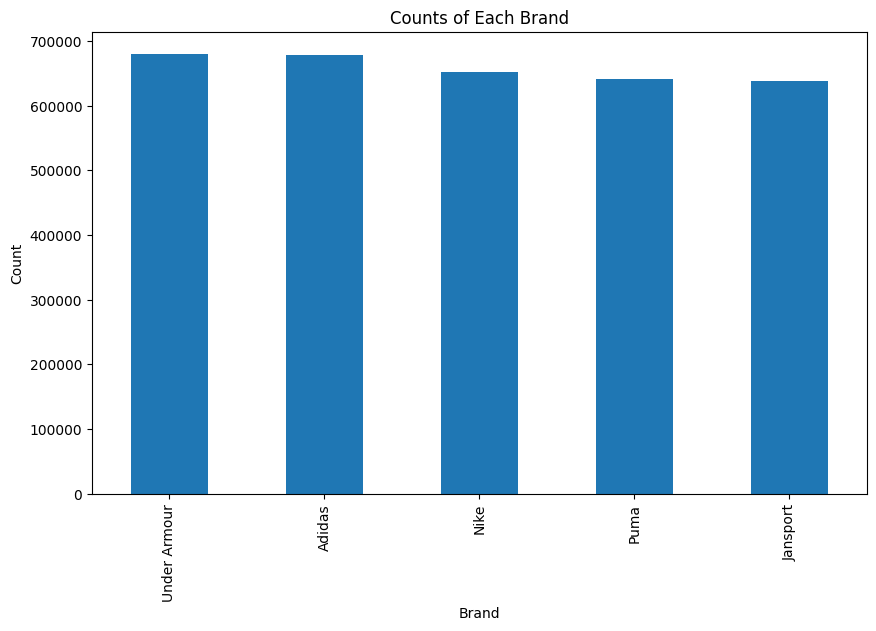

In [22]:
import matplotlib.pyplot as plt

# Get the counts of each brand
brand_counts = data['Brand'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar')
plt.title('Counts of Each Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Convert categorical columns to numerical values
for col in ["Brand", "Material", "Size", "Style", "Color", "Waterproof", "Laptop Compartment"]:
    data[col] = le.fit_transform(data[col])

data.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,4,0,2,10.0,1,1,2,1,23.882052,114.11068
1,3,3,2,4.0,0,1,0,3,11.869095,129.74972
2,1,3,2,8.0,1,1,2,5,8.092302,21.37370
3,2,2,0,7.0,0,0,1,4,7.719581,48.09209
4,2,1,0,9.0,0,1,2,3,22.741826,77.32461


In [25]:
data.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,4,0,2,10.0,1,1,2,1,23.882052,114.11068
1,3,3,2,4.0,0,1,0,3,11.869095,129.74972
2,1,3,2,8.0,1,1,2,5,8.092302,21.37370
3,2,2,0,7.0,0,0,1,4,7.719581,48.09209
4,2,1,0,9.0,0,1,2,3,22.741826,77.32461


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data.drop(columns=['Price'])
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the Conv1D layer
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(32, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
82213/82213 ━━━━━━━━━━━━━━━━━━━━ 462s 6ms/step - loss: 1633.4536 - val_loss: 1513.5647
Epoch 2/10
82213/82213 ━━━━━━━━━━━━━━━━━━━━ 348s 4ms/step - loss: 1573.1804 - val_loss: 1511.0316
Epoch 3/10
82213/82213 ━━━━━━━━━━━━━━━━━━━━ 346s 4ms/step - loss: 1554.8074 - val_loss: 1505.7170
Epoch 4/10
82213/82213 ━━━━━━━━━━━━━━━━━━━━ 348s 4ms/step - loss: 1540.4521 - val_loss: 1505.0369
Epoch 5/10
82213/82213 ━━━━━━━━━━━━━━━━━━━━ 348s 4ms/step - loss: 1529.8324 - val_loss: 1505.4135
Epoch 6/10
82213/82213 ━━━━━━━━━━━━━━━━━━━━ 353s 4ms/step - loss: 1521.8333 - val_loss: 1505.3823
Epoch 7/10
82213/82213 ━━━━━━━━━━━━━━━━━━━━ 373s 5ms/step - loss: 1520.1216 - val_loss: 1506.4448
Epoch 8/10
82213/82213 ━━━━━━━━━━━━━━━━━━━━ 383s 5ms/step - loss: 1514.9316 - val_loss: 1505.9102
Epoch 9/10
82213/82213 ━━━━━━━━━━━━━━━━━━━━ 371s 5ms/step - loss: 1513.4873 - val_loss: 1505.3734
Epoch 10/10
82213/82213 ━━━━━━━━━━━━━━━━━━━━ 377s 5ms/step - loss: 1511.6836 - val_loss: 1505.6962
20554/20554 ━━━━━━━

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Predict the prices for the test set
y_pred = model.predict(X_test).flatten()

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f'R-squared value: {r2}')

20554/20554 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step
Mean Squared Error (MSE): 1505.6938097356965
Mean Absolute Percentage Error (MAPE): 0.6710752188191732
R-squared value: 0.00018000156724029548


In [28]:
null_values_test = test.isnull().sum()
print(null_values_test)

id                         0
Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)      77
dtype: int64


In [29]:
test.drop(columns=['id'], inplace=True)

In [30]:
# Fill null values for categorical columns with mode
categorical_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
for col in categorical_columns:
    test[col].fillna(test[col].mode()[0], inplace=True)

# Fill null values for 'Weight Capacity (kg)' column with mean
test['Weight Capacity (kg)'].fillna(test['Weight Capacity (kg)'].mean(), inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11204\2125980801.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(test[col].mode()[0], inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11204\2125980801.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [31]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Convert categorical columns to numerical values
for col in ["Brand", "Material", "Size", "Style", "Color", "Waterproof", "Laptop Compartment"]:
    test[col] = le.fit_transform(test[col])

test.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,3,1,2,2.0,0,0,2,3,20.671147
1,2,0,1,7.0,0,1,0,3,13.564105
2,0,0,0,9.0,0,1,1,1,11.809799
3,0,2,0,1.0,1,0,1,3,18.477036
4,0,2,0,2.0,1,1,2,0,9.907953


In [32]:
# Standardize the test features
X_test_final = scaler.transform(test)

# Reshape the data to fit the Conv1D layer
X_test_final = X_test_final.reshape(X_test_final.shape[0], X_test_final.shape[1], 1)

# Predict the prices for the test set
test_predictions = model.predict(X_test_final).flatten()

# Create a DataFrame with the test IDs and their corresponding predicted prices
submission = pd.DataFrame({'id': testids, 'Price': test_predictions})

# Save the predictions to a CSV file
submission.to_csv(r"C:\Users\Administrator\Downloads\submission1.csv", index=False)

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


In [ ]:
df.to_csv(r"C:\Users\Administrator\Downloads\submission1.csv", index=False)